In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xp = np.loadtxt("gt_dynamics.csv", delimiter=",", dtype=float)
ywf = np.loadtxt("gt_WF_dynamics.csv", delimiter=",", dtype=float)
ynp = np.loadtxt("gt_NP_dynamics.csv", delimiter=",", dtype=float)
t = xp[:, 0]
n = xp.shape[1] - 1
print(n)
x0 = np.loadtxt("gt_init.csv", delimiter=",", dtype=float)
um = np.loadtxt("gt_eigvec.csv", delimiter=",", dtype=str)
# Make a function to convert csv string to python complex
print(um)
Um = np.zeros((n,n),dtype=complex)
for i in range(n):
    for j in range(n):
        s = um[i,j]
        s = s.replace('i', 'j')
        v = complex(s)
        Um[i, j] = v

print(Um)
dm = np.loadtxt("gt_eigval.csv", delimiter=",", dtype=str)
print(dm)
Dm = np.zeros((n,n),dtype=complex)

for i in range(n):
    for j in range(n):
        s = dm[i,j]
        s = s.replace('i', 'j')
        v = complex(s)
        Dm[i,j] = v

print(Dm)


print(xp.shape)
print(ywf.shape)
print(ynp.shape)

20
[['0.122368011529099-0.0197628859468922i'
  '0.122368011529099+0.0197628859468922i'
  '-0.0458303342511496+0.324904541759445i'
  '-0.0458303342511496-0.324904541759445i'
  '0.0317276497541312+0.067201376182553i'
  '0.0317276497541312-0.067201376182553i'
  '0.106535884928802-0.291128387272202i'
  '0.106535884928802+0.291128387272202i'
  '-0.367035034545473-0.129740463525489i'
  '-0.367035034545473+0.129740463525489i'
  '0.356137640385489+0.056065243421618i'
  '0.356137640385489-0.056065243421618i' '0.628761357319517+0i'
  '0.628761357319517-0i' '0.269508224819371+0.0765263955030266i'
  '0.269508224819371-0.0765263955030266i'
  '0.245348536295467-0.10829456704846i'
  '0.245348536295467+0.10829456704846i'
  '-0.107498112689249-0.14559064325231i'
  '-0.107498112689249+0.14559064325231i']
 ['-0.13422673956313-0.0328696258128664i'
  '-0.13422673956313+0.0328696258128664i' '0.509482223841633+0i'
  '0.509482223841633-0i' '-0.0824575431777506-0.224311223340257i'
  '-0.0824575431777506+0.2243

In [3]:
# Generate a random non-trivial quadratic program.
T = 1000
N = 100

Q = 0.1*np.eye(n)
R = 10*np.eye(n)
IN = np.eye(N)
QN = np.kron(IN, Q)
RN = np.kron(IN, R)

F = np.array([])
G = np.array([])
F = np.empty((0,n), float)
G = np.empty((0,n*N), float)
print(Um.shape)
print(Dm.shape)
print(Um @ Dm**0 @ Um.T)
for i in range(N):

    F = np.real(np.append(F, Um @ Dm**(i+1) @ Um.T, axis=0))
    #F = np.vstack((F, Um @ Dm**i @ Um.T))

    #print(F)
    cc = np.empty((n,0), float)
    #cc = np.array([])

    for j in range(N):
        if j <= i:
            c = np.real(Um @ (Dm**(i-j+1)) @ Um.T)
        else:
            c = np.zeros((n, n))

        cc = np.append(cc, c, axis=1)
        #print(cc.shape)
    G = np.append(G, cc, axis=0)

print(F.shape)
print(G.shape)

(20, 20)
(20, 20)
[[ 6.15063633e+00+0.j  4.74561126e+00+0.j -5.04017494e+00+0.j
  -1.20027286e+00+0.j  5.72329291e-01+0.j  3.74021037e+00+0.j
  -9.30265982e-01+0.j -1.37985168e-01+0.j  4.80744013e+00+0.j
  -4.49341506e+00+0.j -2.58587569e+00+0.j -1.81514678e+00+0.j
   7.58377631e-01+0.j -5.71404609e-01+0.j  5.33739029e-01+0.j
  -6.67267271e-01+0.j  1.46853285e+00+0.j -7.27413351e-01+0.j
   7.46912571e-01+0.j  1.37653882e+00+0.j]
 [ 4.74561126e+00+0.j  3.66154410e+00+0.j -3.88881892e+00+0.j
  -9.26087660e-01+0.j  4.41588834e-01+0.j  2.88581270e+00+0.j
  -7.17759997e-01+0.j -1.06464426e-01+0.j  3.70924905e+00+0.j
  -3.46695853e+00+0.j -1.99516930e+00+0.j -1.40050241e+00+0.j
   5.85137087e-01+0.j -4.40875383e-01+0.j  4.11813967e-01+0.j
  -5.14839588e-01+0.j  1.13306748e+00+0.j -5.61246154e-01+0.j
   5.76291056e-01+0.j  1.06208817e+00+0.j]
 [-5.04017494e+00+0.j -3.88881892e+00+0.j  4.13020085e+00+0.j
   9.83570622e-01+0.j -4.68998587e-01+0.j -3.06493728e+00+0.j
   7.62311903e-01+0.j  1.130

(2000, 20)
(2000, 2000)


In [4]:
B = cp.Variable(n*N)
#prob = cp.Problem(cp.Minimize((F@x0 + G@B).T @ QN @ (F@x0 + G@B) + B.T@RN@B))
prob = cp.Problem(cp.Minimize((cp.quad_form((F@x0 + G@B), QN) + (cp.quad_form(B, RN)))))

prob.solve()

print(prob.value)
print(B.value)
X = F@x0 + G@B.value

0.0034068296448138743
[-8.63403794e-05  9.65281337e-05  1.34198026e-04 ...  3.37637931e-56
 -2.02590603e-54  7.37578189e-55]


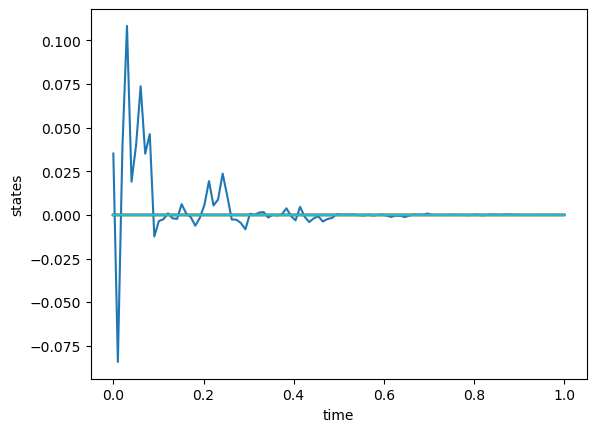

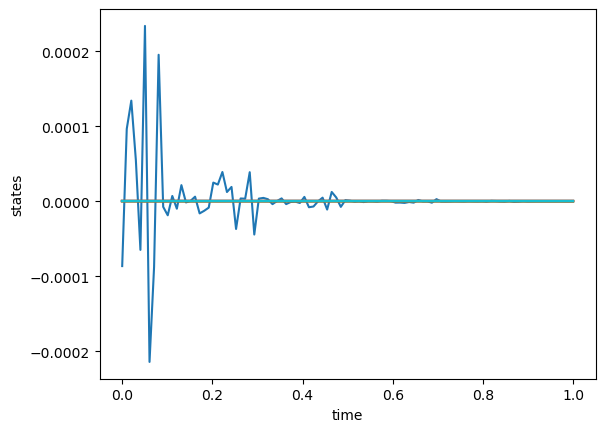

In [5]:
tn = np.linspace(0, 1, 100)
x = np.reshape(X, (n, N))
b = np.reshape(B.value, (n, N))
fig = plt.figure()
plt.plot(tn,x.T)
plt.xlabel("time")
plt.ylabel("states")
plt.show()



fig = plt.figure()
plt.plot(tn,b[:,].T)
plt.xlabel("time")
plt.ylabel("states")
plt.show()

In [6]:
print(x0)
print(X[:20])

[ 0.08985893 -0.03473518 -0.30638006 -0.15166791 -0.10731478 -0.39362445
  0.3353854   0.32723871 -0.44480257 -0.30727838 -0.47676079 -0.02583285
  0.07502002 -0.45358678 -0.1208604   0.08329321  0.0656416   0.02120815
  0.43967965  0.34328181]
[ 0.03516112 -0.08428193  0.03901103  0.10833091  0.01906784  0.04003916
  0.07375492  0.03508868  0.04631766 -0.01235356 -0.00352644 -0.00248338
  0.00093495 -0.00195639 -0.00230545  0.00614575  0.00080391 -0.00125431
 -0.00620106 -0.0016797 ]


In [7]:
print(x[:,0])

[ 3.51611184e-02  2.85678221e-05 -4.01565720e-08 -4.94353112e-11
 -1.79899595e-13  3.14349636e-16  4.17008578e-18 -4.85038192e-21
 -7.41944451e-23  8.41282021e-26  1.30008551e-27 -1.47160658e-30
 -2.27577830e-32  2.57567743e-35  3.98343904e-37 -4.50825067e-40
 -6.97243363e-42  7.89088607e-45  1.22042323e-46 -1.38115868e-49]


In [8]:
print(F)

[[ 9.66302308e-03 -7.26864965e-02 -2.96856599e-02 ... -1.38122467e-02
  -1.39297278e-03  1.00465807e-02]
 [-7.26864965e-02 -4.31134640e-02 -5.43720298e-02 ... -1.00742020e-02
  -1.57328541e-02  8.99065640e-03]
 [-2.96856599e-02 -5.43720298e-02 -1.11524071e-01 ...  5.33020572e-03
   5.07280550e-03 -4.97788388e-03]
 ...
 [ 1.01618031e-51 -1.42795787e-51 -3.39875362e-51 ...  8.52923137e-54
   1.12680474e-52 -3.61475229e-53]
 [ 8.28804585e-51 -8.25931128e-51 -2.94440094e-51 ...  1.12680474e-52
   6.57531751e-52  1.79680624e-52]
 [-2.44494400e-52 -2.33502653e-51 -1.87750337e-50 ... -3.61475229e-53
   1.79680624e-52 -3.66536476e-52]]


In [12]:
print(np.real(Um@Um.T))

[[ 1.15345013e+00  6.13229277e-01 -3.35437875e-01  1.47355297e-01
  -1.18468112e+00  4.52320125e-01 -1.09853830e-01 -8.72518623e-02
  -2.20640735e-01  3.90866276e-01  7.98588733e-02 -1.86020253e-01
   1.60510471e-01 -2.30144510e-01  5.47197779e-02 -5.60528253e-02
   2.71235105e-01 -5.31084673e-02  3.74134871e-02 -3.14815429e-02]
 [ 6.13229277e-01  7.47718804e-01  1.06063219e-01 -1.37687565e-01
  -8.61137694e-02 -1.52271494e-01 -4.75021843e-01  1.58304365e-01
   3.34969154e-01 -1.06362828e-01 -1.50328634e-01 -1.50515787e-01
  -7.36157216e-02  1.25461070e-01 -9.60340879e-02  3.15175954e-02
  -1.73762299e-01 -4.60075584e-02 -1.96851339e-01  2.17495054e-02]
 [-3.35437875e-01  1.06063219e-01  5.37768413e-01  4.56831272e-01
   3.12587496e-01 -2.17743648e-01 -8.12971594e-01 -5.67051004e-01
  -4.56523826e-01  6.31145688e-01  2.30439229e-01  2.12653875e-02
  -7.01297414e-02  2.45900590e-02  1.44770260e-01  1.30934240e-01
   9.84482325e-02  2.15035957e-01  4.26880848e-02  2.25250884e-01]
 [ 1.47

In [13]:
print(Um)

[[ 1.22368012e-01-0.01976289j  1.22368012e-01+0.01976289j
  -4.58303343e-02+0.32490454j -4.58303343e-02-0.32490454j
   3.17276498e-02+0.06720138j  3.17276498e-02-0.06720138j
   1.06535885e-01-0.29112839j  1.06535885e-01+0.29112839j
  -3.67035035e-01-0.12974046j -3.67035035e-01+0.12974046j
   3.56137640e-01+0.05606524j  3.56137640e-01-0.05606524j
   6.28761357e-01+0.j          6.28761357e-01-0.j
   2.69508225e-01+0.0765264j   2.69508225e-01-0.0765264j
   2.45348536e-01-0.10829457j  2.45348536e-01+0.10829457j
  -1.07498113e-01-0.14559064j -1.07498113e-01+0.14559064j]
 [-1.34226740e-01-0.03286963j -1.34226740e-01+0.03286963j
   5.09482224e-01+0.j          5.09482224e-01-0.j
  -8.24575432e-02-0.22431122j -8.24575432e-02+0.22431122j
   2.56791622e-01+0.22344145j  2.56791622e-01-0.22344145j
  -1.35215319e-01+0.00231773j -1.35215319e-01-0.00231773j
   4.01424917e-01+0.j          4.01424917e-01-0.j
   3.81438357e-02-0.04628475j  3.81438357e-02+0.04628475j
  -7.04619335e-02+0.08413422j -7.04619

In [15]:
print(Um[:,0])

[ 1.22368012e-01-0.01976289j -1.34226740e-01-0.03286963j
 -1.33317032e-01-0.37746221j -3.81152960e-02+0.427823j
 -7.68750854e-02+0.04856838j  4.87597615e-02-0.22320169j
  9.19692878e-02-0.33799368j -5.78499252e-01+0.j
 -1.22003085e-03+0.00969176j -3.16612090e-01-0.03190599j
 -2.04887276e-03+0.02645358j -3.38474657e-03-0.00465383j
  7.36113420e-03-0.01572558j  6.37782758e-03+0.00543903j
 -1.02441426e-02-0.00267593j  3.17222027e-03+0.011906j
 -4.07805229e-04+0.0079465j   1.50731152e-03-0.00093777j
  1.06563256e-02+0.00249013j  9.32203557e-04-0.00779193j]


In [20]:
A = Um@(Um.T)
print(A[:,0])

[ 1.15345013+0.j  0.61322928+0.j -0.33543787+0.j  0.1473553 +0.j
 -1.18468112+0.j  0.45232012+0.j -0.10985383+0.j -0.08725186+0.j
 -0.22064074+0.j  0.39086628+0.j  0.07985887+0.j -0.18602025+0.j
  0.16051047+0.j -0.23014451+0.j  0.05471978+0.j -0.05605283+0.j
  0.2712351 +0.j -0.05310847+0.j  0.03741349+0.j -0.03148154+0.j]


In [28]:
print(Um[0,:]*Um[0,:].)

[ 0.01458336-0.00483669j  0.01458336+0.00483669j -0.10346254-0.02978097j
 -0.10346254+0.02978097j -0.00350938+0.00426428j -0.00350938-0.00426428j
 -0.07340584-0.06203124j -0.07340584+0.06203124j  0.11788213+0.09523859j
  0.11788213-0.09523859j  0.12369071+0.03993389j  0.12369071-0.03993389j
  0.39534084+0.j          0.39534084-0.j          0.06677839+0.04124899j
  0.06677839-0.04124899j  0.04846819-0.05313983j  0.04846819+0.05313983j
 -0.00964079+0.03130144j -0.00964079-0.03130144j]


In [25]:
print(Um[:,0])

[ 1.22368012e-01-0.01976289j -1.34226740e-01-0.03286963j
 -1.33317032e-01-0.37746221j -3.81152960e-02+0.427823j
 -7.68750854e-02+0.04856838j  4.87597615e-02-0.22320169j
  9.19692878e-02-0.33799368j -5.78499252e-01+0.j
 -1.22003085e-03+0.00969176j -3.16612090e-01-0.03190599j
 -2.04887276e-03+0.02645358j -3.38474657e-03-0.00465383j
  7.36113420e-03-0.01572558j  6.37782758e-03+0.00543903j
 -1.02441426e-02-0.00267593j  3.17222027e-03+0.011906j
 -4.07805229e-04+0.0079465j   1.50731152e-03-0.00093777j
  1.06563256e-02+0.00249013j  9.32203557e-04-0.00779193j]


In [27]:
print(Um[0,0]*Um[0,0])

(0.014583358584635837-0.004836690110795147j)


In [31]:
u=0
for i in range(n):
    u = u + Um[0,n]*Um[0,n]

IndexError: index 20 is out of bounds for axis 1 with size 20